## **Medicare Inpatient Hospitals-Exploratory Data Analysis and Visualization**

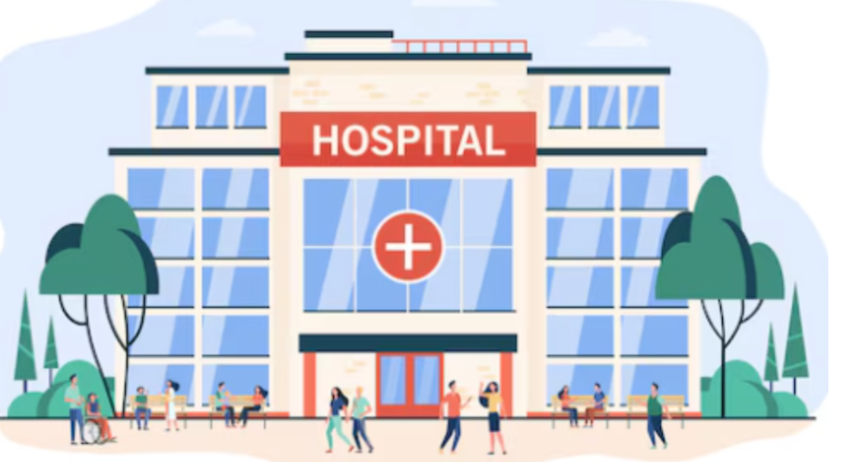

## Import Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load dataset

In [13]:
cms = pd.read_csv('cms.csv')

## Data visualization and analysis

### How payments distributed? Normal, skewed or multimodal?

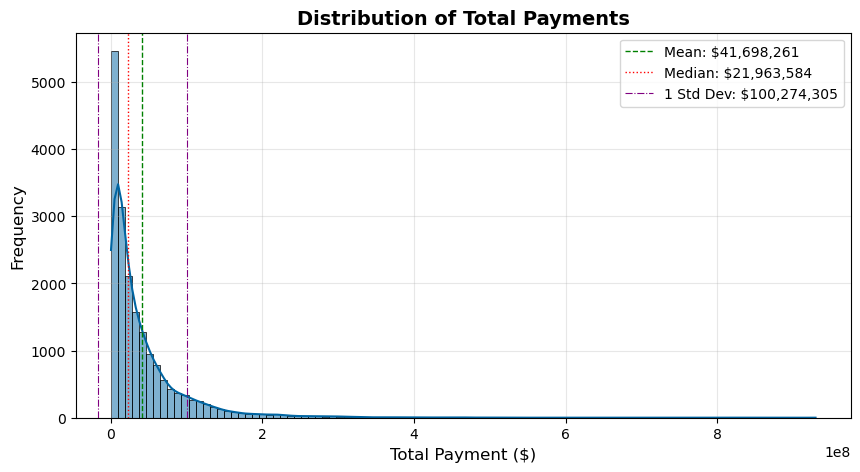

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(cms['Total_Payment'], bins=100, color='#0065a2', alpha=0.5, kde=True)

mean_val = cms['Total_Payment'].mean()
median_val = cms['Total_Payment'].median()
std_val = cms['Total_Payment'].std()

plt.axvline(mean_val, color='green', linestyle='dashed', linewidth=1, label=f'Mean: ${mean_val:,.0f}')
plt.axvline(median_val, color='red', linestyle='dotted', linewidth=1, label=f'Median: ${median_val:,.0f}')
plt.axvline(mean_val + std_val, color='purple', linestyle='dashdot', linewidth=0.8, label=f'1 Std Dev: ${mean_val + std_val:,.0f}')
plt.axvline(mean_val - std_val, color='purple', linestyle='dashdot', linewidth=0.8)
plt.title('Distribution of Total Payments', fontsize=14, fontweight='bold')
plt.xlabel('Total Payment ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Most hospitals have lower total payments, but a few have very high costs (right skew).
# Mean is higher than the typical payment, suggesting some extreme cases.
# Further analysis on hospital ownership, location, or rating could explain the differences.

### Which hospital ownership type receives the highest median total payment?

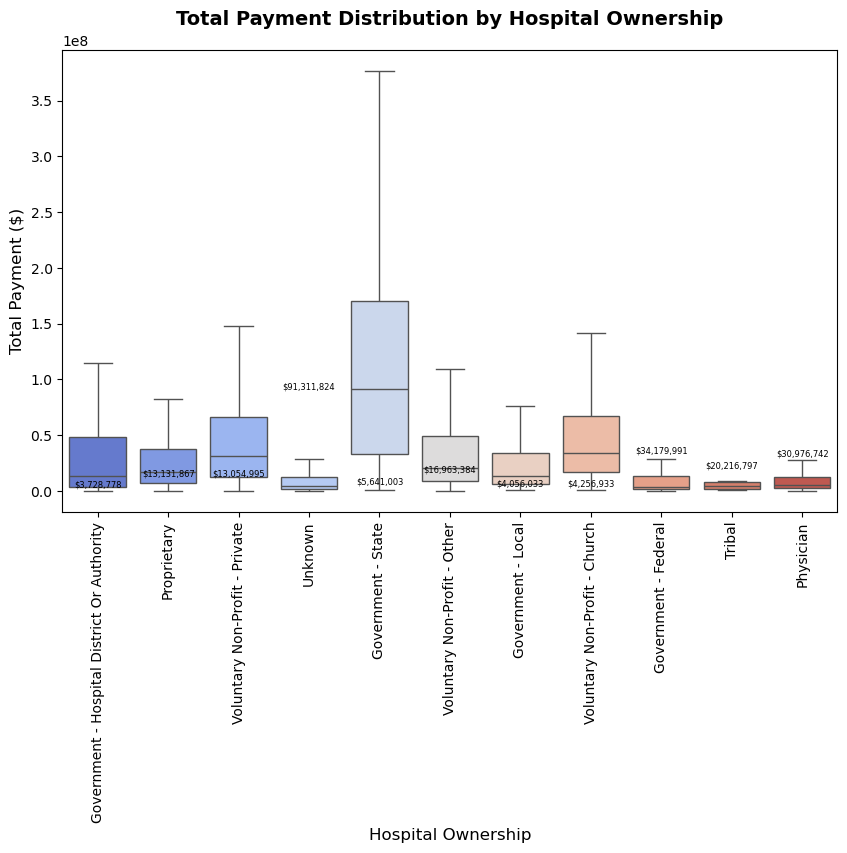

In [17]:

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(
    data=cms, 
    x='Hosp_Own', 
    y='Total_Payment', 
    hue='Hosp_Own', 
    showfliers=False, 
    palette='coolwarm'
)
plt.xticks(rotation=90) 

# Add median values as text annotations
medians = cms.groupby("Hosp_Own", observed=True)['Total_Payment'].median()
for i, median in enumerate(medians):
    ax.text(i, median , f"${median:,.0f}", ha='center', va='baseline', fontsize=6, color='black')
plt.title('Total Payment Distribution by Hospital Ownership', fontweight='bold', fontsize=14, pad = 18)
plt.xlabel('Hospital Ownership', fontsize=12)
plt.ylabel('Total Payment ($)', fontsize=12)
plt.show()

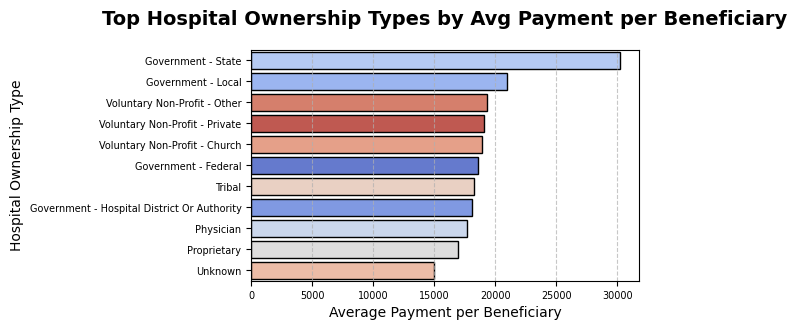

In [19]:
# Average payment per beneficiary for hospital ownership groups
df_by_ownership = cms.groupby('Hosp_Own', observed=True)[['Avg_Payment_Per_Benef']].mean().reset_index()

fig, ax=plt.subplots(figsize=(5,3))
sns.barplot(data=df_by_ownership, x=df_by_ownership['Avg_Payment_Per_Benef'], y=df_by_ownership['Hosp_Own'], edgecolor='black', 
            order=df_by_ownership.sort_values(by='Avg_Payment_Per_Benef', ascending=False).Hosp_Own, palette='coolwarm', 
           hue = df_by_ownership['Hosp_Own'])
plt.xlabel('Average Payment per Beneficiary', fontsize=10)
plt.ylabel('Hospital Ownership Type', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Top Hospital Ownership Types by Avg Payment per Beneficiary', fontsize=14, fontweight='bold', pad = 18)
plt.grid(axis='x', linestyle='--', alpha=0.7)

### Do urban hospitals have higher average payments than rural ones?


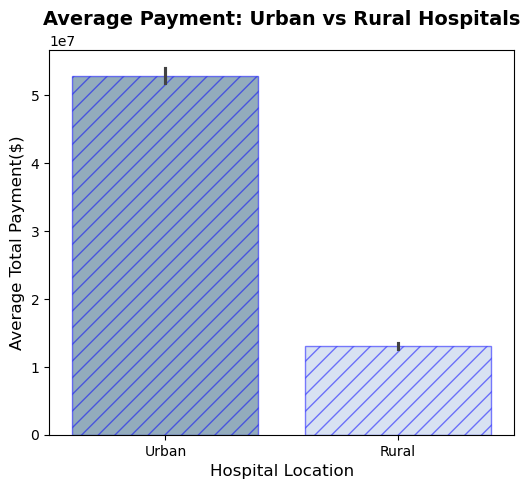

In [21]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(
    x='Urban_Rural', 
    y='Total_Payment', 
    data=cms, 
    estimator=np.mean, 
    ax=ax, 
    saturation=0.5, 
    hue='Urban_Rural',
    palette=['#0065a2', '#99bfff'], 
    hatch = '//',
    edgecolor = 'blue',
    alpha=0.5)
ax.set_title('Average Payment: Urban vs Rural Hospitals', fontsize=14, fontweight='bold', pad = 18)
ax.set_xlabel('Hospital Location', fontsize=12) 
ax.set_ylabel('Average Total Payment($)', fontsize=12)  
plt.show()

### State-wise Analysis of healthcare payments, beneficiaries and discharges


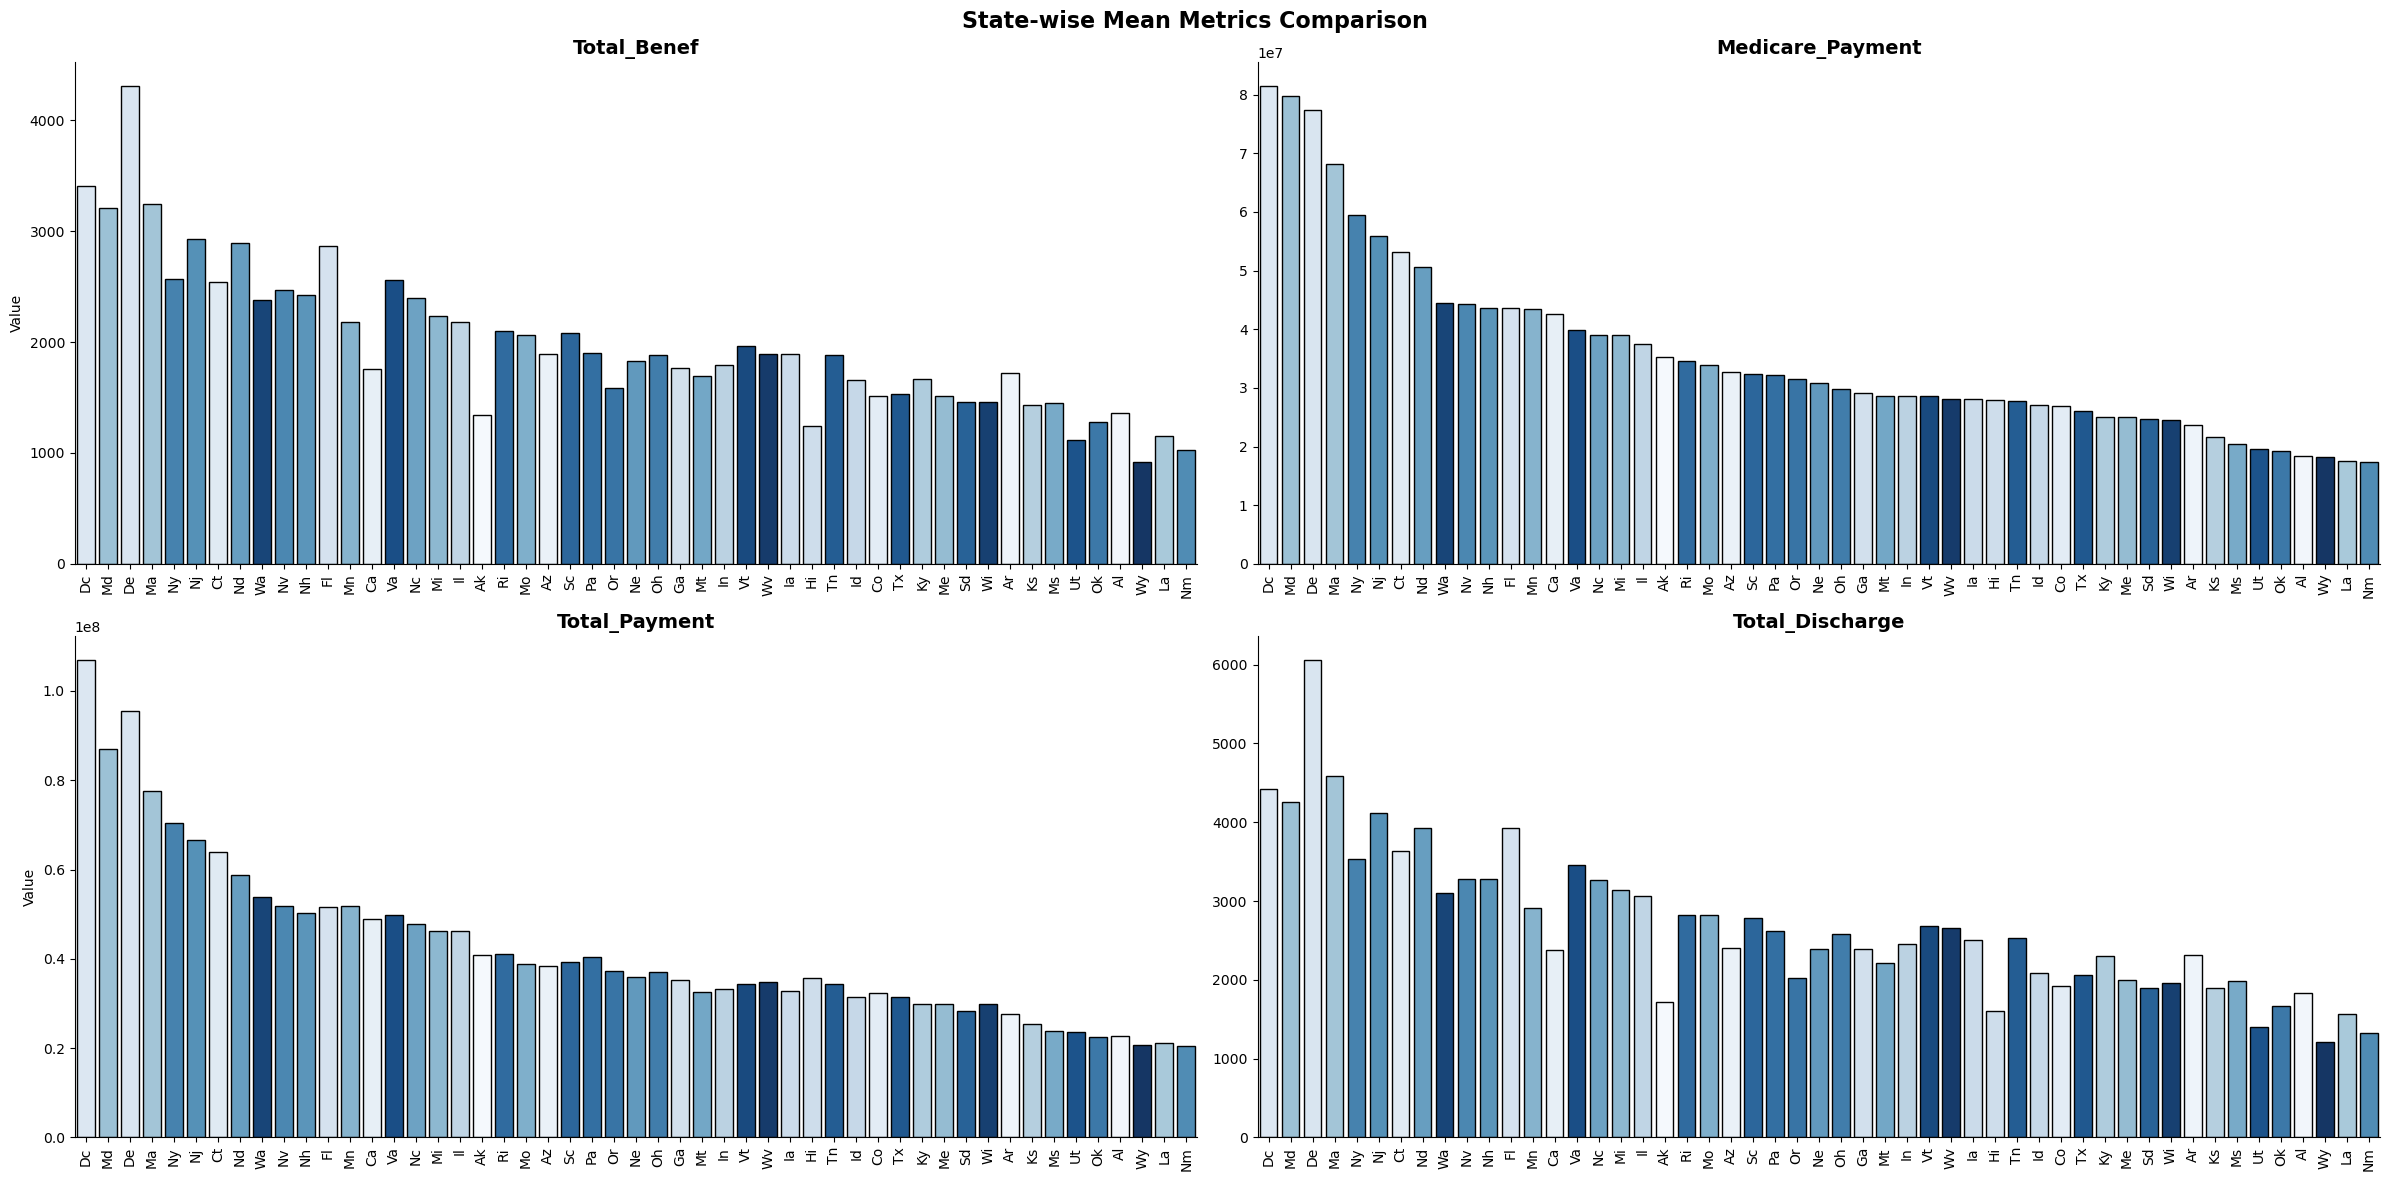

In [23]:
# State-wise grouping of key business metrics
df_by_state = cms.groupby('State', observed=True)[['Total_Benef', 'Medicare_Payment', 'Total_Payment', 'Total_Discharge']].mean().reset_index()

# Convert to long format for FacetGrid compatibility
df_long = df_by_state.melt(id_vars=['State'], var_name='Metric', value_name='Value')
df_long_sorted = df_long.sort_values(by=['Metric', 'Value'], ascending=[True, False])

g = sns.FacetGrid(df_long, col='Metric', col_wrap=2, sharex=False, sharey=False, height=6, aspect=2)
g.map_dataframe(sns.barplot, data=df_long_sorted, x='State', y='Value', edgecolor='black', palette='Blues', hue='State', order=df_long_sorted['State'].unique())
g.set_titles(col_template='{col_name}', size=14, fontweight='bold')
g.set_xlabels('') 
g.set_ylabels('Value')
g.set_xticklabels(rotation=90)
g.fig.suptitle("State-wise Mean Metrics Comparison", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [125]:
# Get top 5 states for each metric
top_5_benef = df_by_state.nlargest(5, 'Total_Benef')[['State', 'Total_Benef']].round(1)
top_5_medicare = df_by_state.nlargest(5, 'Medicare_Payment')[['State', 'Medicare_Payment']].round(1)
top_5_total_payment = df_by_state.nlargest(5, 'Total_Payment')[['State', 'Total_Payment']].round(1)
top_5_discharge = df_by_state.nlargest(5, 'Total_Discharge')[['State', 'Total_Discharge']].round(1)

# Display top 5 states for each category
print("Top 5 States by Total Beneficiaries:\n", top_5_benef.to_string(index=False), "\n")
print("Top 5 States by Medicare Payment:\n", top_5_medicare.to_string(index=False), "\n")
print("Top 5 States by Total Payment:\n", top_5_total_payment.to_string(index=False), "\n")
print("Top 5 States by Total Discharges:\n", top_5_discharge.to_string(index=False), "\n")

Top 5 States by Total Beneficiaries:
 State  Total_Benef
   DE       4306.4
   DC       3402.9
   MA       3246.5
   MD       3205.3
   NJ       2931.3 

Top 5 States by Medicare Payment:
 State  Medicare_Payment
   DC        81436263.1
   MD        79830437.8
   DE        77463478.8
   MA        68178308.7
   NY        59548119.9 

Top 5 States by Total Payment:
 State  Total_Payment
   DC    106988919.9
   DE     95534338.7
   MD     87070055.1
   MA     77478698.1
   NY     70385134.2 

Top 5 States by Total Discharges:
 State  Total_Discharge
   DE           6061.9
   MA           4586.8
   DC           4423.7
   MD           4257.5
   NJ           4113.9 



### Which age group accounts for the largest share of hospital patients?

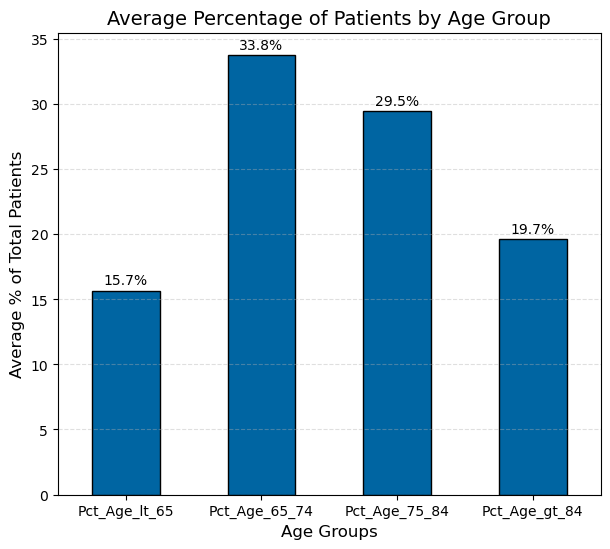

In [25]:

age_group_avg = cms[['Pct_Age_lt_65', 'Pct_Age_65_74', 'Pct_Age_75_84', 'Pct_Age_gt_84']].mean()

fig, ax = plt.subplots(figsize=(7, 6))
bars = age_group_avg.plot(kind='bar', color='#0065a2', edgecolor='black', ax=ax)
ax.bar_label(bars.containers[0], fmt="%.1f%%", fontsize=10, padding=2)

plt.title("Average Percentage of Patients by Age Group", fontsize=14)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Average % of Total Patients", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Do more women receive hospital care than men?

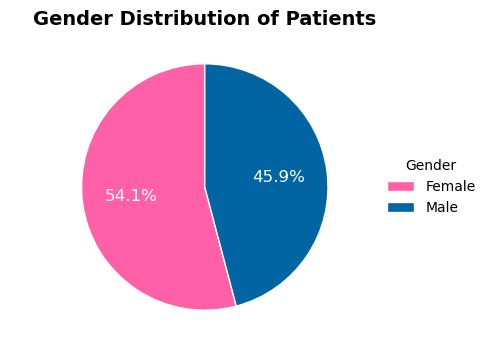

In [27]:
gender_data = cms[['Pct_Female', 'Pct_Male']].mean()
labels = ['Female', 'Male']
colors = ['#ff60a8', '#0065a2']

fig, ax =plt.subplots(figsize=(5, 4))
ax.pie(gender_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, 
        textprops={'color': 'white', 'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
plt.title('Gender Distribution of Patients', fontsize=14, fontweight='bold')
plt.legend(title="Gender", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=10, frameon=False)
plt.show()

### How do key hospital metrics correlate with each other?

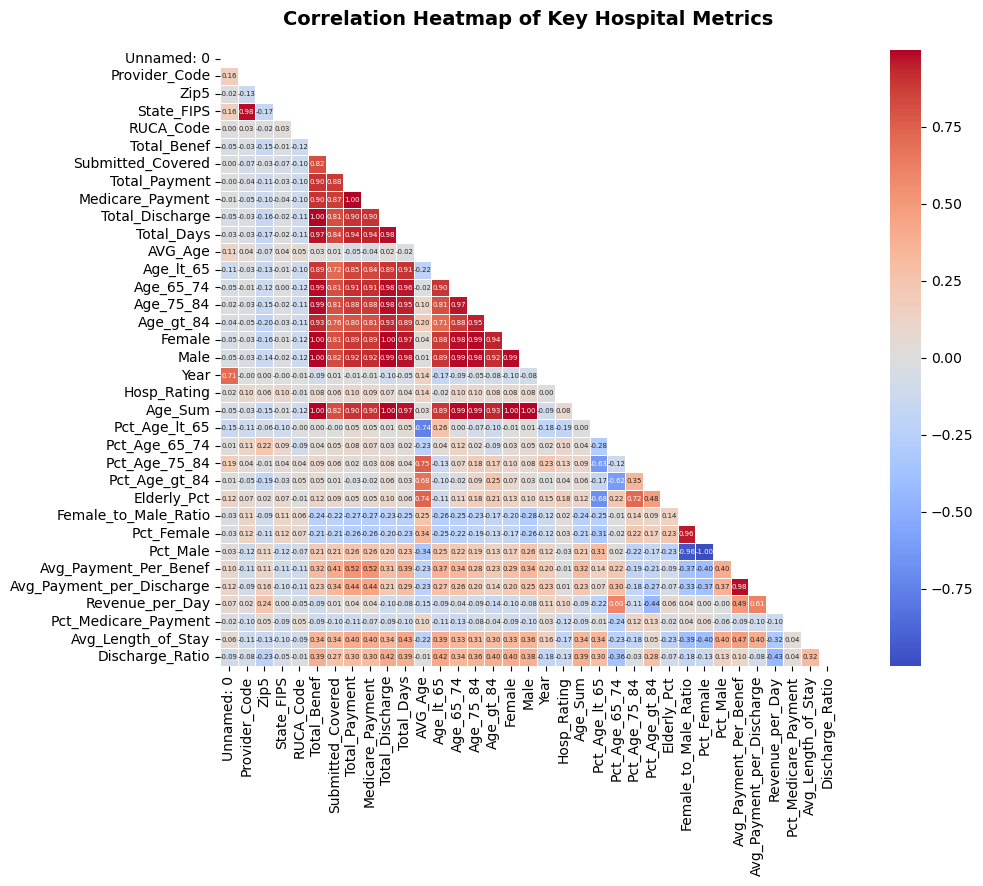

In [29]:
fig, ax=plt.subplots(figsize=(14, 8))
corr_matrix = cms.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, center=0, square=True, annot_kws={'fontsize':5})
plt.title("Correlation Heatmap of Key Hospital Metrics", fontsize=14, fontweight='bold', pad=18)
plt.show()


### How do hospital discharges and length of stay impact revenue and payments?

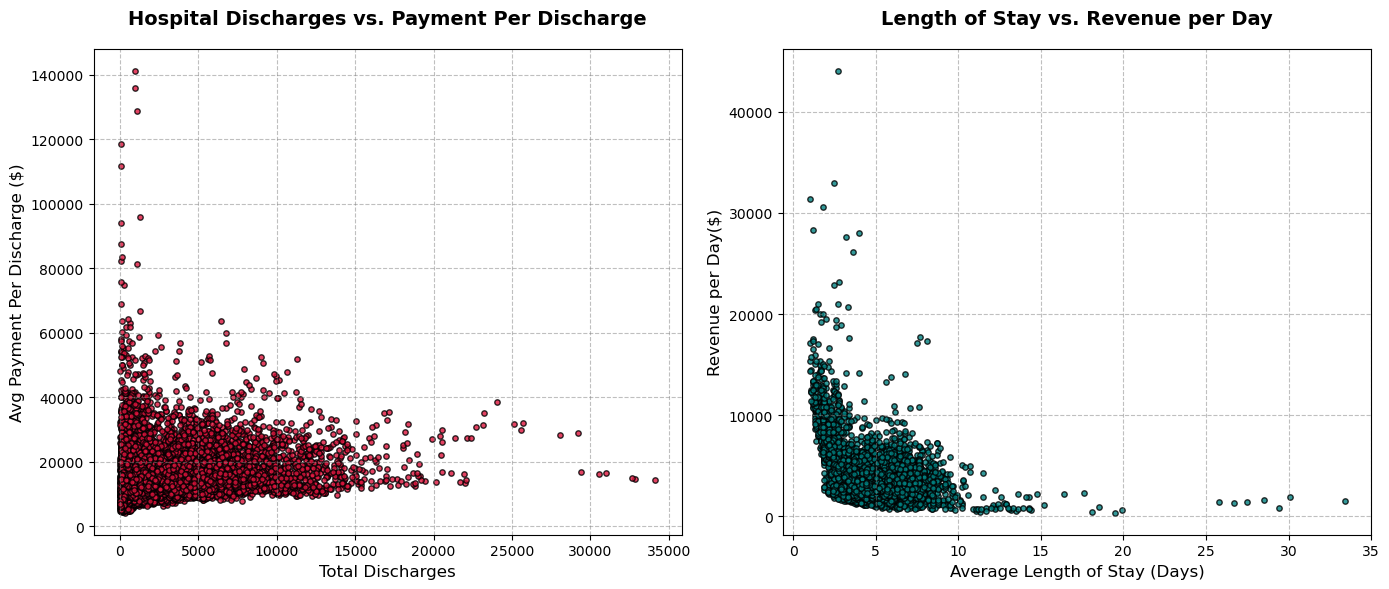

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(cms['Total_Discharge'], cms['Avg_Payment_per_Discharge'], 
               s=15, c='crimson', marker='o', alpha=0.8, edgecolor='black')
axs[0].set_xlabel('Total Discharges', fontsize=12)
axs[0].set_ylabel('Avg Payment Per Discharge ($)', fontsize=12)
axs[0].set_title("Hospital Discharges vs. Payment Per Discharge", fontsize=14, fontweight='bold', pad=18)
axs[0].grid(color='grey', linestyle='--', alpha=0.5)

axs[1].scatter(cms['Avg_Length_of_Stay'], cms['Revenue_per_Day'],
               s=15, c='teal', marker='o', alpha=0.8, edgecolor='black')
axs[1].set_xlabel('Average Length of Stay (Days)', fontsize=12)
axs[1].set_ylabel('Revenue per Day($)', fontsize=12)
axs[1].set_title("Length of Stay vs. Revenue per Day", fontsize=14, fontweight='bold', pad=18)
axs[1].grid(color='grey', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### How did COVID-19 impact gender ratio and elderly patient trends in hospitals?

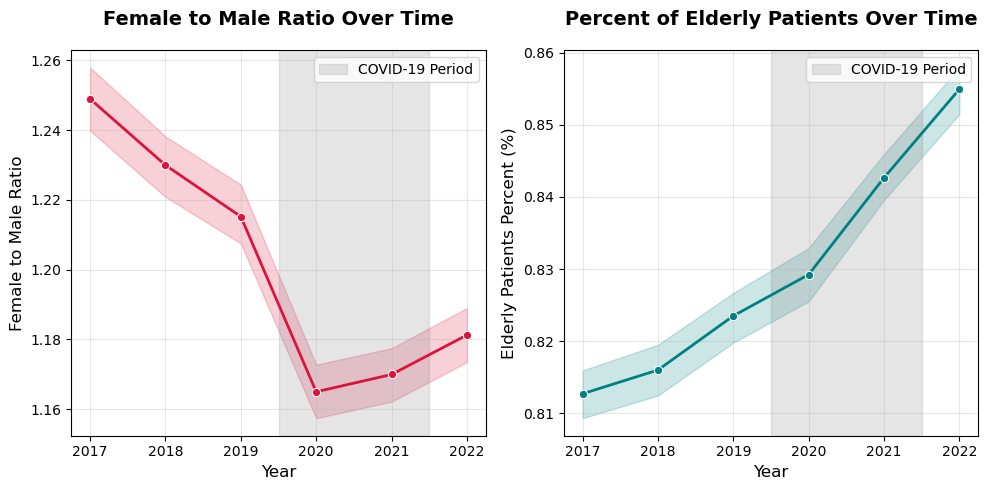

In [35]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x='Year', y='Female_to_Male_Ratio', data=cms, marker='o', color='crimson', linewidth=2, ax=axs[0])
axs[0].axvspan(2019.5, 2021.5, color='gray', alpha=0.2, label='COVID-19 Period')
axs[0].set_title('Female to Male Ratio Over Time', fontsize=14, fontweight='bold', pad =18)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Female to Male Ratio', fontsize=12)
axs[0].legend(loc='upper right')
axs[0].grid(alpha=0.3)

sns.lineplot(x='Year', y='Elderly_Pct', data=cms, marker='o', color='teal', linewidth=2, ax=axs[1])
axs[1].axvspan(2019.5, 2021.5, color='gray', alpha=0.2, label='COVID-19 Period')
axs[1].set_title('Percent of Elderly Patients Over Time', fontsize=14, fontweight='bold', pad=18)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Elderly Patients Percent (%)', fontsize=12)
axs[1].legend(loc='upper right')
axs[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# Find the top 5 hospitals based on Avg_Payment_per_Discharge
top_hospitals_avg_payment = cms.groupby('Provider_Name')[['Avg_Payment_per_Discharge', 'State', 'Hosp_Rating']].max()
top_hospitals_avg_payment = top_hospitals_avg_payment.sort_values(by='Avg_Payment_per_Discharge', ascending=False).head(5)

# Find the top 5 hospitals based on Revenue_per_Day
top_hospitals_revenue = cms.groupby('Provider_Name')[['Revenue_per_Day', 'State', 'Hosp_Type']].max()
top_hospitals_revenue = top_hospitals_revenue.sort_values(by='Revenue_per_Day', ascending=False).head(5)

# Display results
print('Top 5 Hospitals by Avg Payment per Discharge:')
print(top_hospitals_avg_payment)
print('\nTop 5 Hospitals by Revenue per Day:')
print(top_hospitals_revenue)

Top 5 Hospitals by Avg Payment per Discharge:
                               Avg_Payment_per_Discharge State  Hosp_Rating
Provider_Name                                                              
Harris Health System                            141161.8    Tx            3
Burke Medical Center                            118572.1    Ga            3
Provident Hospital Of Chicago                   111801.3    Il            3
Faith Community Hospital                         94022.4    Tx            3
Wise Health System                               83376.4    Tx            3

Top 5 Hospitals by Revenue per Day:
                                          Revenue_per_Day State  \
Provider_Name                                                     
Burke Medical Center                              44026.8    Ga   
Wise Health System                                32962.8    Tx   
Precision Ambulatory Surgery Center, Llc          31381.8    Ca   
Us Pain & Spine Hospital                          